# Plotting Figure 4
> Domain of linearity of discrete shape derivative for acoustic duct

Slope: -84.45922242737166


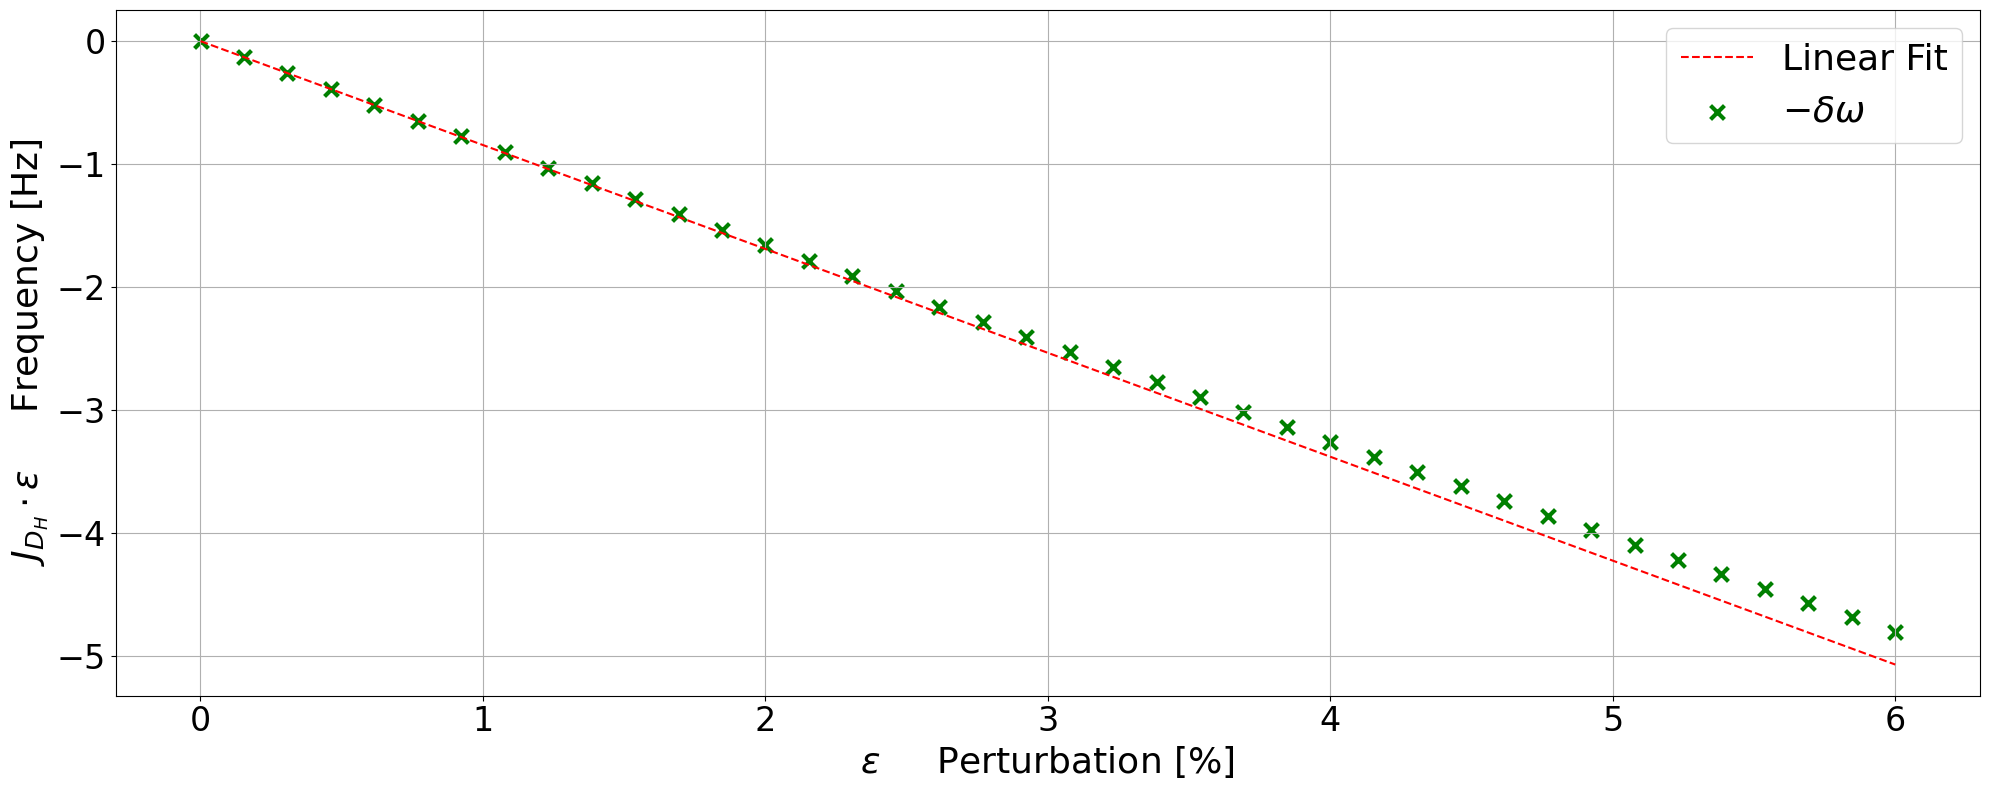

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

fontsize = 26
os.chdir(os.path.join(os.getcwd()))
file = os.path.join('data_fig4.txt')

with open(file, 'r') as f:
    lines = f.readlines()
perturbations = []
discrete_shape_derivatives = []

# read the data from the file
for line in lines[1:]: # skip the first line
    p, der = line.strip().split(',')
    perturbations.append(float(p))
    discrete_shape_derivatives.append(float(der))
# transform the lists into numpy arrays to perform operations
perturbations = np.array(perturbations)

# create figure and axes
fig, ax = plt.subplots(figsize=(20, 8))

# Fit a linear line to the first few data points
# real part
slope, intercept = np.polyfit(perturbations[:2], discrete_shape_derivatives[:2], 1)
linear_fit = slope * perturbations + intercept
print('Slope:', slope)
ax.plot(perturbations*100, linear_fit, 'r--', label='Linear Fit')

# plot the real part of shape derivatives
ax.scatter(perturbations*100, discrete_shape_derivatives, color='green', label=r'$-\delta \omega$', s=100, marker='x', linewidth=3)
#ax.plot(perturbations*100, discrete_shape_derivatives, color='green', marker='o', label='Discrete Shape Derivative', markersize=10, linewidth=2)
# set labels and title
ax.set_xlabel(r'$\epsilon$     Perturbation [%]', fontsize=fontsize)
ax.set_ylabel(r'$J_{D_H}\cdot \epsilon$     Frequency [Hz]', fontsize=fontsize)
ax.legend(loc='upper right')
ax.legend(fontsize=fontsize)
ax.grid(True)


# Increase the font size of the axis numbers
ax.tick_params(axis='both', which='major', labelsize=24)

plt.tight_layout() # make plot look better
plt.show() # show the plot

# Save the figure to the 'Images/' folder
fig.savefig(os.path.join('Images/', 'Fig4.png'))
